In [1]:
import os

tickers = [
    "2302", "2303", "2329", "2330", "2337", "2338", "2340", "2342", "2344", "2351", "2363", "2369", "2379", "2388", "2401",
    "2408", "2434", "2436", "2441", "2449", "2451", "2454", "2458", "2481", "3006", "3014", "3016", '3034', "3035", "3041",
    "3094", "3189", "3257", "3413", "3443", "3450", "3530", "3532", "3545", "3583", "3588", "3592", "3661", "3686", "3711",
    "4919", "4952", "4961", "4967", "4968", "5222", "5269", "5285", "5471", "6202", "6239", "6243", "6257", "6271", "6415",
    "6451", "6515", "6525", "6531", "6533", "6552", "6573", "6695", "6719", "6756", "6770", "6789", "6799", "6854", "8016",
    "8028", "8081", "8110", "8131", "8150", "8261", "8271", "IR0001"]

os.environ["TEJAPI_BASE"] = "http://api.tej.com.tw"
os.environ['TEJAPI_KEY'] = "your key"
os.environ["ticker"] = " ".join(tickers)
os.environ["mdate"] = "20180101 20230831"

!zipline ingest -b tquant

Merging daily equity files:


[2023-09-01 03:10:29.881965] INFO: zipline.data.bundles.core: Ingesting tquant.


In [2]:
import alphalens
import pandas as pd
import numpy as np
from zipline.data.data_portal import get_bundle
from zipline.data import bundles

bundle_name = 'tquant'
bundle = bundles.load(bundle_name)


df_bundle = get_bundle(bundle_name='tquant',
                        calendar_name='TEJ',
                        start_dt=pd.Timestamp("2020-01-01", tz = "utc"),
                        end_dt=pd.Timestamp("2023-08-31", tz = "utc"))
df_bundle

,date,sid,symbol,asset,open,high,low,close,volume,open_adj,...,close_adj,volume_adj,dividend_payouts.amount,dividend_payouts.declared_date,dividend_payouts.div_percent,dividend_payouts.pay_date,dividend_payouts.record_date,dividends.ratio,splits.ratio,mergers.ratio
0,2020-01-02 00:00:00+00:00,0,2302,Equity(0 [2302]),8.24,8.28,8.11,8.11,2.230000e+05,7.500,...,7.382,2.230000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
1,2020-01-02 00:00:00+00:00,1,2303,Equity(1 [2303]),16.45,16.65,16.40,16.55,3.293700e+07,13.284,...,13.365,3.293700e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,2,2329,Equity(2 [2329]),15.00,15.55,15.00,15.25,8.783000e+06,13.378,...,13.601,8.783000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
3,2020-01-02 00:00:00+00:00,3,2330,Equity(3 [2330]),332.50,339.00,332.50,339.00,3.328200e+07,307.775,...,313.792,3.328200e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
4,2020-01-02 00:00:00+00:00,4,2337,Equity(4 [2337]),37.85,38.70,37.45,38.00,7.299800e+07,31.523,...,31.647,7.299800e+07,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73948,2023-08-31 00:00:00+00:00,78,8131,Equity(78 [8131]),39.60,39.60,39.30,39.30,1.190000e+05,39.600,...,39.300,1.190000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
73949,2023-08-31 00:00:00+00:00,79,8150,Equity(79 [8150]),38.00,38.40,37.95,38.35,2.478000e+06,38.000,...,38.350,2.478000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
73950,2023-08-31 00:00:00+00:00,80,8261,Equity(80 [8261]),82.70,83.10,81.80,82.10,5.930000e+05,82.700,...,82.100,5.930000e+05,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN
73951,2023-08-31 00:00:00+00:00,81,8271,Equity(81 [8271]),52.90,54.20,52.60,53.70,1.060000e+06,52.900,...,53.700,1.060000e+06,NaN,NaT,NaN,NaT,NaT,NaN,NaN,NaN


In [32]:
import zipline.sources.TEJ_Api_Data as tej
from zipline.pipeline.data.tejquant  import TQDataSet
import pandas as pd 
import numpy as np
import TejToolAPI

columns = ["coid", "mdate", "Net_Income_Rate_percent", "Total_Assets_Turnover", "Total_Equity", "Total_Assets", "Market_Cap_Dollars"]

tejdata = TejToolAPI.get_history_data(
    ticker = tickers,
    columns = columns,
    start = pd.Timestamp("2018-01-01", tz = "utc"),
    end = pd.Timestamp("2023-08-30", tz = "utc"),
    transfer_to_chinese=False,
    fin_type = ["Q"]
)


tejdata["Financial_Leverage_Q"] = tejdata["Total_Assets_Q"] / tejdata["Total_Equity_Q"]
tejdata["ROE"] = tejdata["Net_Income_Rate_percent_Q"] * tejdata["Total_Assets_Turnover_Q"] * tejdata["Financial_Leverage_Q"]
tejdata = tejdata.sort_values(["coid", "mdate"])
data = tejdata[(tejdata["mdate"] >= "2020-01-01") & (tejdata["mdate"] <= "2022-08-30")]

# raw, simpler_custom_loader = tej.create_custom_loader_for_algo(ticker=tickers,
#                                                                columns=columns,
#                                                                start = pd.Timestamp("2012-01-01", tz = "utc"),
#                                                                end = pd.Timestamp("2023-08-31", tz = "utc"),
#                                                                bundle_name="tquant")

In [33]:
data[data["coid"] == '2330']

,coid,mdate,Market_Cap_Dollars,Total_Assets_Q,Total_Equity_Q,Net_Income_Rate_percent_Q,Total_Assets_Turnover_Q,Financial_Leverage_Q,ROE
4626,2330,2020-01-02,8.790399e+12,2.134234e+09,1.587497e+09,34.5,0.13,1.344402,6.029644
4627,2330,2020-01-03,8.803364e+12,2.134234e+09,1.587497e+09,34.5,0.13,1.344402,6.029644
4628,2330,2020-01-06,8.608886e+12,2.134234e+09,1.587497e+09,34.5,0.13,1.344402,6.029644
4629,2330,2020-01-07,8.544060e+12,2.134234e+09,1.587497e+09,34.5,0.13,1.344402,6.029644
4630,2330,2020-01-08,8.544060e+12,2.134234e+09,1.587497e+09,34.5,0.13,1.344402,6.029644
...,...,...,...,...,...,...,...,...,...
5270,2330,2022-08-24,1.304298e+13,4.345941e+09,2.510462e+09,44.4,0.13,1.731132,9.992094
5271,2330,2022-08-25,1.317263e+13,4.345941e+09,2.510462e+09,44.4,0.13,1.731132,9.992094
5272,2330,2022-08-26,1.327635e+13,4.345941e+09,2.510462e+09,44.4,0.13,1.731132,9.992094
5273,2330,2022-08-29,1.292629e+13,4.345941e+09,2.510462e+09,44.4,0.13,1.731132,9.992094


# Alphalens

In [34]:
pricing = df_bundle[['date','symbol','open_adj']].set_index(['date','symbol']).iloc[1:].\
                                              unstack('symbol')['open_adj']
pricing.head(6)

symbol,2302,2303,2329,2330,2337,2338,2340,2342,2344,2351,...,6854,8016,8028,8081,8110,8131,8150,8261,8271,IR0001
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+00:00,NaN,13.284,13.378,307.775,31.523,31.051,22.436,18.808,18.861,58.307,...,NaN,115.745,60.635,98.624,11.392,28.817,26.635,26.667,33.939,NaN
2020-01-03 00:00:00+00:00,7.445,13.365,13.601,318.420,32.355,31.276,22.566,18.993,19.051,61.083,...,NaN,117.812,61.696,101.742,11.392,29.087,26.907,26.843,34.623,NaN
2020-01-06 00:00:00+00:00,7.254,12.961,13.289,308.238,31.981,29.568,21.698,18.297,19.004,58.844,...,NaN,114.367,58.350,98.624,10.956,28.393,26.403,25.698,34.502,NaN
2020-01-07 00:00:00+00:00,7.436,12.961,13.066,307.775,32.897,29.748,21.654,18.111,18.671,60.188,...,NaN,113.678,57.208,98.234,10.811,28.702,25.937,25.302,34.623,NaN
2020-01-08 00:00:00+00:00,7.254,12.800,13.021,300.833,30.731,27.951,21.134,17.554,18.149,57.859,...,NaN,115.056,55.902,92.386,10.714,28.239,24.813,24.774,33.697,NaN
2020-01-09 00:00:00+00:00,7.273,12.800,13.155,310.089,32.564,28.310,21.047,17.879,18.386,58.396,...,NaN,112.989,56.555,95.115,10.859,28.393,25.666,24.642,35.026,NaN


In [35]:
period_set = (15, 30, 45, 60, 180, 240)

## ROE檢驗

In [36]:
data.mdate = pd.to_datetime(data.mdate, utc = True)
predictive_factor = data[['mdate','coid','ROE']].set_index(['mdate','coid']).unstack('coid')
predictive_factor = predictive_factor.stack()
predictive_factor

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor,
                                                                   pricing,
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   periods=period_set
                                                                   )
factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


15D       30D       45D       60D  \
date                      asset                                           
2020-01-02 00:00:00+00:00 2303  -0.121575 -0.033424 -0.164107 -0.130684   
                          2329  -0.166692 -0.136642 -0.399985 -0.296681   
                          2330  -0.052633 -0.039097 -0.203009 -0.126943   
                          2337  -0.022460 -0.064746 -0.315738 -0.141357   
                          2338  -0.177997 -0.109980 -0.348749 -0.234421   
...                                   ...       ...       ...       ...   
2022-08-30 00:00:00+00:00 8110  -0.030445 -0.136926 -0.125471 -0.057046   
                          8131  -0.005198 -0.062344 -0.002613  0.018178   
                          8150  -0.088765 -0.181687 -0.122048 -0.076265   
                          8261  -0.013092 -0.109163 -0.133625 -0.052396   
                          8271   0.004933  0.055543  0.002453  0.033331   

                                     180D      240D    factor  factor_quantile  
date                      asset                                                 
2020-01-02 00:00:00+00:00 2303   0.813234  2.007151  0.937645                2  
                          2329  -0.300344  0.027508  4.121054                4  
                          2330   0.331154  0.589759  6.029644                5  
                          2337  -0.123878  0.116074  5.638545                5  
                          2338  -0.145535  0.203762  3.583549                4  
...                                   ...       ...       ...              ...  
2022-08-30 00:00:00+00:00 8110   0.045591  0.037903 -0.366674                1  
                          8131   0.124659  0.106959  5.820956                3  
                          8150   0.095722  0.126146  5.581064                3  
                          8261  -0.061127 -0.258811  6.818412                4  
                          8271   0.511106  0.333751  4.560528                3  

[48023 rows x 8 columns]

In [37]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data,
                                                                               by_date=False)

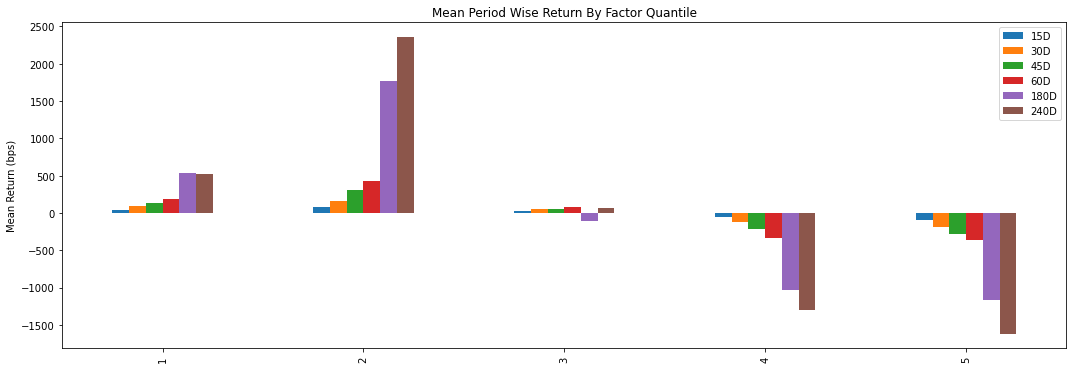

In [38]:
import matplotlib.pyplot as plt
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)
plt.savefig("C:/Users/Admin/Documents/TEJ 實習/TEJ Zipline/交易策略/Plots/ROE plots.png")

## 淨利率檢驗

In [39]:
data.mdate = pd.to_datetime(data.mdate, utc = True)
predictive_factor = data[['mdate','coid','Net_Income_Rate_percent_Q']].set_index(['mdate','coid']).unstack('coid')
predictive_factor = predictive_factor.stack()
predictive_factor

Net_Income_Rate_percent_Q
mdate                     coid                           
2020-01-02 00:00:00+00:00 2302                       2.29
                          2303                       5.14
                          2329                       5.04
                          2330                      34.50
                          2337                      15.56
...                                                   ...
2022-08-30 00:00:00+00:00 8110                      -1.56
                          8131                      25.39
                          8150                      19.27
                          8261                      24.74
                          8271                       6.94

[48024 rows x 1 columns]

In [40]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor,
                                                                   pricing,
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   periods=period_set
                                                                   )
factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


15D       30D       45D       60D  \
date                      asset                                           
2020-01-02 00:00:00+00:00 2303  -0.121575 -0.033424 -0.164107 -0.130684   
                          2329  -0.166692 -0.136642 -0.399985 -0.296681   
                          2330  -0.052633 -0.039097 -0.203009 -0.126943   
                          2337  -0.022460 -0.064746 -0.315738 -0.141357   
                          2338  -0.177997 -0.109980 -0.348749 -0.234421   
...                                   ...       ...       ...       ...   
2022-08-30 00:00:00+00:00 8110  -0.030445 -0.136926 -0.125471 -0.057046   
                          8131  -0.005198 -0.062344 -0.002613  0.018178   
                          8150  -0.088765 -0.181687 -0.122048 -0.076265   
                          8261  -0.013092 -0.109163 -0.133625 -0.052396   
                          8271   0.004933  0.055543  0.002453  0.033331   

                                     180D      240D  factor  factor_quantile  
date                      asset                                               
2020-01-02 00:00:00+00:00 2303   0.813234  2.007151    5.14                2  
                          2329  -0.300344  0.027508    5.04                2  
                          2330   0.331154  0.589759   34.50                5  
                          2337  -0.123878  0.116074   15.56                4  
                          2338  -0.145535  0.203762   10.19                3  
...                                   ...       ...     ...              ...  
2022-08-30 00:00:00+00:00 8110   0.045591  0.037903   -1.56                1  
                          8131   0.124659  0.106959   25.39                4  
                          8150   0.095722  0.126146   19.27                3  
                          8261  -0.061127 -0.258811   24.74                4  
                          8271   0.511106  0.333751    6.94                1  

[48023 rows x 8 columns]

In [41]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data,
                                                                               by_date=False)
mean_return_by_q.head()

,15D,30D,45D,60D,180D,240D
factor_quantile,,,,,,
1,0.006575,0.015897,0.026869,0.040996,0.093861,0.083092
2,0.013628,0.025653,0.036626,0.044884,0.139421,0.263030
3,-0.004667,-0.010457,-0.020356,-0.029887,0.017769,0.024459
4,-0.008301,-0.015462,-0.022568,-0.029288,-0.152456,-0.210759
5,-0.007320,-0.015932,-0.021422,-0.028342,-0.100662,-0.155806


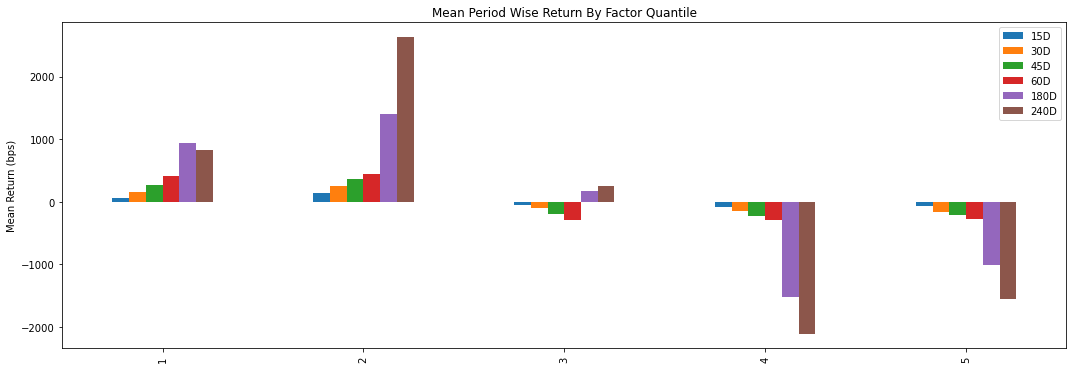

In [42]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)
plt.savefig("C:/Users/Admin/Documents/TEJ 實習/TEJ Zipline/交易策略/Plots/Net Margin plots.png")

## 營收周轉率檢驗

In [43]:
data.mdate = pd.to_datetime(data.mdate, utc = True)
predictive_factor = data[['mdate','coid','Total_Assets_Turnover_Q']].set_index(['mdate','coid']).unstack('coid')
predictive_factor = predictive_factor.stack()

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor,
                                                                   pricing,
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   periods=period_set
                                                                   )
factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


15D       30D       45D       60D  \
date                      asset                                           
2020-01-02 00:00:00+00:00 2303  -0.121575 -0.033424 -0.164107 -0.130684   
                          2329  -0.166692 -0.136642 -0.399985 -0.296681   
                          2330  -0.052633 -0.039097 -0.203009 -0.126943   
                          2337  -0.022460 -0.064746 -0.315738 -0.141357   
                          2338  -0.177997 -0.109980 -0.348749 -0.234421   
...                                   ...       ...       ...       ...   
2022-08-30 00:00:00+00:00 8110  -0.030445 -0.136926 -0.125471 -0.057046   
                          8131  -0.005198 -0.062344 -0.002613  0.018178   
                          8150  -0.088765 -0.181687 -0.122048 -0.076265   
                          8261  -0.013092 -0.109163 -0.133625 -0.052396   
                          8271   0.004933  0.055543  0.002453  0.033331   

                                     180D      240D  factor  factor_quantile  
date                      asset                                               
2020-01-02 00:00:00+00:00 2303   0.813234  2.007151    0.10                1  
                          2329  -0.300344  0.027508    0.30                5  
                          2330   0.331154  0.589759    0.13                1  
                          2337  -0.123878  0.116074    0.18                3  
                          2338  -0.145535  0.203762    0.19                3  
...                                   ...       ...     ...              ...  
2022-08-30 00:00:00+00:00 8110   0.045591  0.037903    0.12                1  
                          8131   0.124659  0.106959    0.18                3  
                          8150   0.095722  0.126146    0.16                3  
                          8261  -0.061127 -0.258811    0.22                4  
                          8271   0.511106  0.333751    0.42                5  

[48023 rows x 8 columns]

In [44]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data,
                                                                               by_date=False)

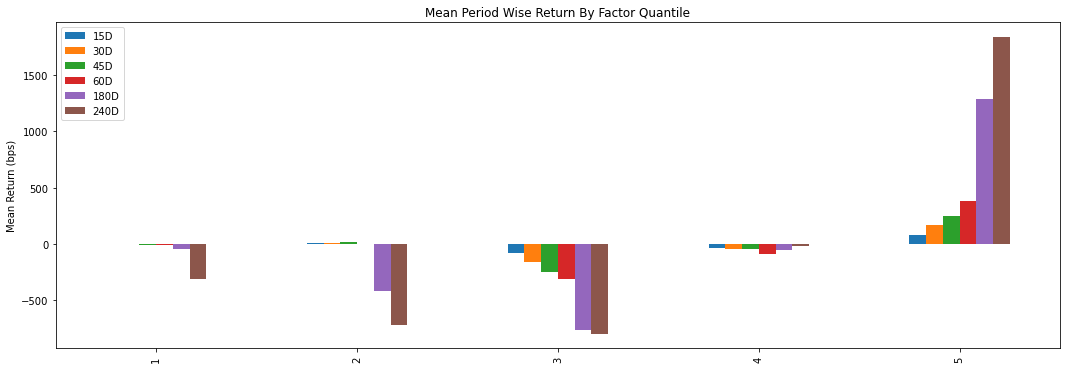

In [45]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)
plt.savefig("C:/Users/Admin/Documents/TEJ 實習/TEJ Zipline/交易策略/Plots/Asset Turnover plots.png")

## 財務槓桿鑑驗

In [46]:
data.mdate = pd.to_datetime(data.mdate, utc = True)
predictive_factor = data[['mdate','coid','Financial_Leverage_Q']].set_index(['mdate','coid']).unstack('coid')
predictive_factor = predictive_factor.stack()
predictive_factor

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor,
                                                                   pricing,
                                                                   quantiles=5,
                                                                   bins=None,
                                                                   periods=period_set
                                                                   )
factor_data

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


15D       30D       45D       60D  \
date                      asset                                           
2020-01-02 00:00:00+00:00 2303  -0.121575 -0.033424 -0.164107 -0.130684   
                          2329  -0.166692 -0.136642 -0.399985 -0.296681   
                          2330  -0.052633 -0.039097 -0.203009 -0.126943   
                          2337  -0.022460 -0.064746 -0.315738 -0.141357   
                          2338  -0.177997 -0.109980 -0.348749 -0.234421   
...                                   ...       ...       ...       ...   
2022-08-30 00:00:00+00:00 8110  -0.030445 -0.136926 -0.125471 -0.057046   
                          8131  -0.005198 -0.062344 -0.002613  0.018178   
                          8150  -0.088765 -0.181687 -0.122048 -0.076265   
                          8261  -0.013092 -0.109163 -0.133625 -0.052396   
                          8271   0.004933  0.055543  0.002453  0.033331   

                                     180D      240D    factor  factor_quantile  
date                      asset                                                 
2020-01-02 00:00:00+00:00 2303   0.813234  2.007151  1.824213                4  
                          2329  -0.300344  0.027508  2.725565                5  
                          2330   0.331154  0.589759  1.344402                2  
                          2337  -0.123878  0.116074  2.013191                5  
                          2338  -0.145535  0.203762  1.850911                4  
...                                   ...       ...       ...              ...  
2022-08-30 00:00:00+00:00 8110   0.045591  0.037903  1.958728                4  
                          8131   0.124659  0.106959  1.273676                1  
                          8150   0.095722  0.126146  1.810153                4  
                          8261  -0.061127 -0.258811  1.252740                1  
                          8271   0.511106  0.333751  1.564611                2  

[48023 rows x 8 columns]

In [47]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data,
                                                                               by_date=False)

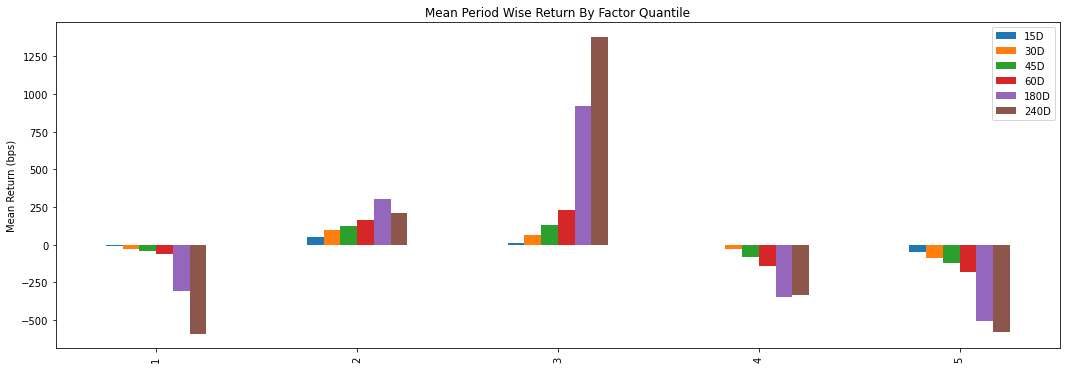

In [48]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)
plt.savefig("C:/Users/Admin/Documents/TEJ 實習/TEJ Zipline/交易策略/Plots/Financial Leverage plots.png")

# 綁定 TejToolAPI 到 Zipline

In [49]:
from zipline.pipeline.data.dataset import Column, DataSet
from zipline.pipeline.domain import TW_EQUITIES

class CustomDataset(DataSet):
    
    Total_Equity_Q = Column(dtype=float)
    Net_Income_Rate_percent_Q = Column(dtype=float)
    Total_Assets_Turnover_Q = Column(dtype=float)
    Total_Assets_Q = Column(dtype=float)
    Financial_Leverage_Q = Column(dtype=float)
    ROE = Column(dtype=float)
    Market_Cap_Dollars_Q = Column(dtype=float)
    
    domain = TW_EQUITIES

In [50]:
sids = bundle.asset_finder.equities_sids
assets = bundle.asset_finder.retrieve_all(sids)
symbol_mapping_sid = {i.symbol:i.sid for i in assets}

transform_data = tejdata.set_index(['coid', 'mdate']).unstack('coid')
transform_data = transform_data.rename(columns = symbol_mapping_sid)

In [51]:
transform_data.index = transform_data.index.tz_localize("UTC")

In [52]:
from zipline.pipeline.loaders.frame import DataFrameLoader

inputs=[CustomDataset.Total_Equity_Q,
        CustomDataset.Net_Income_Rate_percent_Q,
        CustomDataset.Total_Assets_Turnover_Q,
        CustomDataset.Total_Assets_Q,
        CustomDataset.Financial_Leverage_Q,
        CustomDataset.ROE
        ]

Custom_loader = {
    CustomDataset.Total_Equity_Q : DataFrameLoader(column = CustomDataset.Total_Equity_Q, baseline = transform_data["Total_Equity_Q"]),
    CustomDataset.Net_Income_Rate_percent_Q : DataFrameLoader(column = CustomDataset.Net_Income_Rate_percent_Q, baseline = transform_data["Net_Income_Rate_percent_Q"]),
    CustomDataset.Total_Assets_Turnover_Q : DataFrameLoader(column = CustomDataset.Total_Assets_Turnover_Q, baseline = transform_data["Total_Assets_Turnover_Q"]),
    CustomDataset.Total_Assets_Q : DataFrameLoader(column = CustomDataset.Total_Assets_Q, baseline = transform_data["Total_Assets_Q"]),
    CustomDataset.Financial_Leverage_Q : DataFrameLoader(column = CustomDataset.Financial_Leverage_Q, baseline = transform_data["Financial_Leverage_Q"]),
    CustomDataset.ROE : DataFrameLoader(column = CustomDataset.ROE, baseline = transform_data["ROE"]),
    CustomDataset.Market_Cap_Dollars_Q : DataFrameLoader(column = CustomDataset.Market_Cap_Dollars_Q, baseline = transform_data["Market_Cap_Dollars"])
}

# Custom_loader = {i:DataFrameLoader(column=i, baseline=transform_data[i.name]) for i in inputs}
Custom_loader

{CustomDataset<TW>.Total_Equity_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20023c5a340>,
 CustomDataset<TW>.Net_Income_Rate_percent_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025842a00>,
 CustomDataset<TW>.Total_Assets_Turnover_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025842280>,
 CustomDataset<TW>.Total_Assets_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025ba4fd0>,
 CustomDataset<TW>.Financial_Leverage_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025ba4910>,
 CustomDataset<TW>.ROE::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025ba47f0>,
 CustomDataset<TW>.Market_Cap_Dollars_Q::float64: <zipline.pipeline.loaders.frame.DataFrameLoader at 0x20025b77250>}

# 交易策略組建

In [53]:
from zipline.pipeline import SimplePipelineEngine
from zipline.pipeline.data import EquityPricing
from zipline.pipeline.loaders import EquityPricingLoader
pricing_loader = EquityPricingLoader.without_fx(bundle.equity_daily_bar_reader,
                                                bundle.adjustment_reader)
def choose_loader(column):
    if column.name in EquityPricing._column_names:
        return pricing_loader
    elif column.name in CustomDataset._column_names:     
        return Custom_loader[column]
    else:
        raise Exception('Column not available')
    
engine = SimplePipelineEngine(get_loader = choose_loader,
                              asset_finder = bundle.asset_finder,
                              default_domain = TW_EQUITIES)

In [54]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import RSI, BollingerBands
def make_pipeline():
    
    condition0 = CustomDataset.ROE.latest.quintiles()
    condition1 = CustomDataset.Net_Income_Rate_percent_Q.latest.quintiles()
    condition2 = CustomDataset.Total_Assets_Turnover_Q.latest.quintiles()
    condition3 = CustomDataset.Financial_Leverage_Q.latest.quintiles()
    mkt = CustomDataset.Market_Cap_Dollars_Q.latest
    
    bbands = BollingerBands(inputs=[EquityPricing.close], window_length=20, k=2)
    upper,middle,lower = bbands.upper,bbands.middle, bbands.lower

    rsi = RSI(inputs=[EquityPricing.close], window_length=20)
    
    return Pipeline(
        columns = {
            "upper" : upper,
            "middle" : middle, 
            "lower" : lower,
            "rsi" : rsi,
            "mkt" : mkt,
            "condition1" : condition1
        }
    )

pipeline_result = engine.run_pipeline(make_pipeline(), pd.Timestamp("2020-01-03", tz = "utc"), pd.Timestamp('2023-08-30', tz = "utc"))
pipeline_result

upper        middle  \
2020-01-03 00:00:00+00:00 Equity(0 [2302])         8.479961      7.964000   
                          Equity(1 [2303])        16.932560     16.565000   
                          Equity(2 [2329])        15.624971     15.082500   
                          Equity(3 [2330])       349.957835    329.213679   
                          Equity(4 [2337])        38.767299     36.902500   
...                                                     ...           ...   
2023-08-30 00:00:00+00:00 Equity(78 [8131])       40.394950     39.395000   
                          Equity(79 [8150])       37.903184     36.665000   
                          Equity(80 [8261])       96.369505     86.580000   
                          Equity(81 [8271])       53.801817     51.600000   
                          Equity(82 [IR0001])  36609.120548  35683.916000   

                                                      lower        rsi  \
2020-01-03 00:00:00+00:00 Equity(0 [2302])         7.448039  58.549223   
                          Equity(1 [2303])        16.197440  50.000000   
                          Equity(2 [2329])        14.540029  39.393939   
                          Equity(3 [2330])       308.469523  67.178421   
                          Equity(4 [2337])        35.037701  62.096774   
...                                                     ...        ...   
2023-08-30 00:00:00+00:00 Equity(78 [8131])       38.395050  37.037037   
                          Equity(79 [8150])       35.426816  64.084507   
                          Equity(80 [8261])       76.790495  27.169811   
                          Equity(81 [8271])       49.398183  39.705882   
                          Equity(82 [IR0001])  34758.711452  37.986722   

                                                        mkt  condition1  
2020-01-03 00:00:00+00:00 Equity(0 [2302])     1.348716e+09           0  
                          Equity(1 [2303])     1.948596e+11           1  
                          Equity(2 [2329])     8.499260e+09           1  
                          Equity(3 [2330])     8.790399e+12           4  
                          Equity(4 [2337])     6.991723e+10           4  
...                                                     ...         ...  
2023-08-30 00:00:00+00:00 Equity(78 [8131])    1.744567e+10           3  
                          Equity(79 [8150])    2.745332e+10           3  
                          Equity(80 [8261])    9.631653e+09           2  
                          Equity(81 [8271])    6.342983e+09           2  
                          Equity(82 [IR0001])  5.206175e+13          -1  

[68881 rows x 6 columns]

## 每月再平衡- 1

In [145]:
from zipline.api import (set_slippage, 
                         set_benchmark, 
                         set_commission, 
                         attach_pipeline, 
                         pipeline_output, 
                         symbol, 
                         order, 
                         order_target_percent,
                         schedule_function,
                         date_rules
                        )
from zipline import run_algorithm
from zipline.finance import slippage, commission
from zipline.pipeline import Pipeline
from zipline.pipeline.data import EquityPricing

def make_pipeline():
    
    condition1 = CustomDataset.ROE.latest.quintiles()
    condition2 = CustomDataset.Net_Income_Rate_percent_Q.latest.quintiles()
    condition3 = CustomDataset.Total_Assets_Turnover_Q.latest.quintiles()
    condition4 = CustomDataset.Financial_Leverage_Q.latest.quintiles()
    mkt = CustomDataset.Market_Cap_Dollars_Q.latest

    return Pipeline(
        columns = {
            "con1" : condition1,
            "con2" : condition2,
            "con3" : condition3,
            "con4" : condition4,
            "mkt" : mkt
        }
    )

def initialize(context):
    context.holding_position = list()
    set_slippage(slippage.VolumeShareSlippage())
    set_benchmark(symbol("IR0001"))
    set_commission(commission.PerShare(0.00285))
    attach_pipeline(make_pipeline(), "mystrategy")
    schedule_function(handle_data, date_rule=date_rules.month_end())
    
def handle_data(context, data):
    
    outs = pipeline_output('mystrategy')
    tradable = outs[ (outs["con1"] <= 2) ].index.tolist() 
    buyable = list(set(tradable) - set(context.holding_position))
    sellable = context.holding_position
    new_buy, new_sell = [], []

    mybuy = outs.loc[tradable]
    mybuy['pct'] = mybuy['mkt'].apply(lambda x: x/sum(mybuy['mkt']))
    
    print("可買入:", buyable)
    print("上期持有部位:", context.holding_position)
    
    for stock in tradable:
        order_target_percent(stock, mybuy.loc[stock, 'pct'])
        new_buy.append(stock)
        
    for stock in sellable:
        if (outs.loc[stock, "con1"] > 2)  :
            order_target_percent(stock, 0)
            new_sell.append(stock)
    
    context.holding_position = list(set(context.holding_position + new_buy) - set(new_sell) )
    
    print("新買入部位:", new_buy)
    print("新賣出部位:", new_sell)
    print("當期持有部位:", context.holding_position)
            
        
    print('-'*100)
    
def analyze(context, perf):
    pass

results = run_algorithm(
    start = pd.Timestamp("2022-08-31", tz = "utc"),
    end = pd.Timestamp('2023-08-30', tz ='utc'),
    initialize=initialize,
    bundle='tquant',
    analyze=analyze,
    capital_base=1e6,
#     handle_data = handle_data,
    custom_loader = Custom_loader
)

可買入: [Equity(0 [2302]), Equity(2 [2329]), Equity(5 [2338]), Equity(6 [2340]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(18 [2441]), Equity(19 [2449]), Equity(23 [2481]), Equity(25 [3014]), Equity(26 [3016]), Equity(29 [3041]), Equity(30 [3094]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3661]), Equity(43 [3686]), Equity(44 [3711]), Equity(47 [4961]), Equity(48 [4967]), Equity(49 [4968]), Equity(50 [5222]), Equity(51 [5269]), Equity(52 [5285]), Equity(55 [6239]), Equity(56 [6243]), Equity(58 [6271]), Equity(60 [6451]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(68 [6719]), Equity(71 [6789]), Equity(73 [6854]), Equity(75 [8028]), Equity(77 [8110]), Equity(78 [8131]), Equity(79 [8150]), Equity(81 [8271]), Equity(82 [IR0001])]
上期持有部位: []
新買入部位: [Equity(0 [2302]), Equity(2 [

可買入: [Equity(67 [6695]), Equity(69 [6756]), Equity(8 [2344]), Equity(41 [3592]), Equity(46 [4952]), Equity(19 [2449]), Equity(20 [2451]), Equity(52 [5285]), Equity(53 [5471]), Equity(54 [6202])]
上期持有部位: [Equity(0 [2302]), Equity(2 [2329]), Equity(4 [2337]), Equity(5 [2338]), Equity(6 [2340]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(18 [2441]), Equity(23 [2481]), Equity(24 [3006]), Equity(25 [3014]), Equity(26 [3016]), Equity(27 [3034]), Equity(29 [3041]), Equity(30 [3094]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3661]), Equity(43 [3686]), Equity(47 [4961]), Equity(48 [4967]), Equity(49 [4968]), Equity(50 [5222]), Equity(51 [5269]), Equity(55 [6239]), Equity(56 [6243]), Equity(58 [6271]), Equity(60 [6451]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(68 [6719]), Equi

可買入: [Equity(2 [2329]), Equity(4 [2337]), Equity(78 [8131]), Equity(80 [8261]), Equity(31 [3189])]
上期持有部位: [Equity(0 [2302]), Equity(6 [2340]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(18 [2441]), Equity(19 [2449]), Equity(20 [2451]), Equity(23 [2481]), Equity(24 [3006]), Equity(26 [3016]), Equity(29 [3041]), Equity(30 [3094]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(40 [3588]), Equity(41 [3592]), Equity(42 [3661]), Equity(43 [3686]), Equity(46 [4952]), Equity(47 [4961]), Equity(48 [4967]), Equity(49 [4968]), Equity(50 [5222]), Equity(52 [5285]), Equity(53 [5471]), Equity(54 [6202]), Equity(55 [6239]), Equity(56 [6243]), Equity(58 [6271]), Equity(60 [6451]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(68 [6719]), Equity(69 [6756]), Equity(71 [6789]), Equity(73 [6854]), Equity(77 [8110]), Equ

可買入: [Equity(70 [6770]), Equity(41 [3592]), Equity(48 [4967]), Equity(59 [6415]), Equity(31 [3189])]
上期持有部位: [Equity(0 [2302]), Equity(2 [2329]), Equity(4 [2337]), Equity(6 [2340]), Equity(7 [2342]), Equity(8 [2344]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(18 [2441]), Equity(20 [2451]), Equity(22 [2458]), Equity(23 [2481]), Equity(24 [3006]), Equity(26 [3016]), Equity(29 [3041]), Equity(30 [3094]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(40 [3588]), Equity(43 [3686]), Equity(46 [4952]), Equity(49 [4968]), Equity(52 [5285]), Equity(53 [5471]), Equity(54 [6202]), Equity(56 [6243]), Equity(57 [6257]), Equity(58 [6271]), Equity(60 [6451]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(68 [6719]), Equity(69 [6756]), Equity(71 [6789]), Equity(73 [6854]), Equity(75 [8028]), Equity(76 [8081]), Equity(77 [8110]), Equ

In [146]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# 時區標準化
returns.index = returns.index.tz_localize(None).tz_localize('UTC')
positions.index = positions.index.tz_localize(None).tz_localize('UTC')
transactions.index = transactions.index.tz_localize(None).tz_localize('UTC')
benchmark_rets.index = benchmark_rets.index.tz_localize(None).tz_localize('UTC')

In [149]:
results.benchmark_period_return

2022-08-31 00:00:00+08:00    0.009490
2022-09-01 00:00:00+08:00   -0.010106
2022-09-02 00:00:00+08:00   -0.018714
2022-09-05 00:00:00+08:00   -0.019326
2022-09-06 00:00:00+08:00   -0.018182
                               ...   
2023-08-24 00:00:00+08:00    0.162602
2023-08-25 00:00:00+08:00    0.142754
2023-08-28 00:00:00+08:00    0.144864
2023-08-29 00:00:00+08:00    0.152963
2023-08-30 00:00:00+08:00    0.159651
Name: benchmark_period_return, Length: 241, dtype: float64

In [150]:
from pyfolio.plotting import show_perf_stats
show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions
)

Start date,2022-08-31
End date,2023-08-30
Total months,11
,Backtest
Annual return,17.34%
Cumulative returns,16.524%
Annual volatility,15.773%
Sharpe ratio,1.09
Calmar ratio,1.20
Stability,0.83
Max drawdown,-14.474%


<AxesSubplot:ylabel='Cumulative returns'>

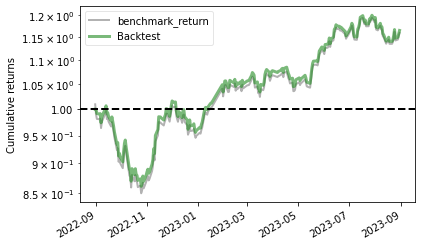

In [151]:
from pyfolio.plotting import plot_rolling_returns
plot_rolling_returns(returns,
                     benchmark_rets, 
                     logy=True, 
#                      volatility_match = True
                    )

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

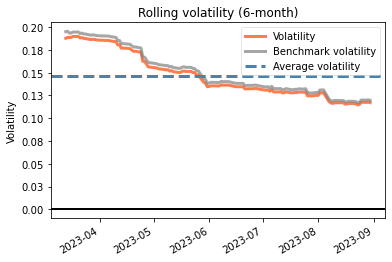

In [152]:
from pyfolio.plotting import plot_rolling_volatility
plot_rolling_volatility(returns,
                        factor_returns=benchmark_rets
                       )

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

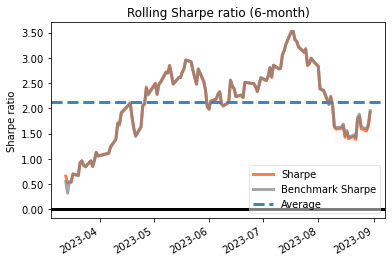

In [153]:
from pyfolio.plotting import plot_rolling_sharpe
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets
                       )

## 每月再平衡- 2

In [154]:
from zipline.api import (set_slippage, 
                         set_benchmark, 
                         set_commission, 
                         attach_pipeline, 
                         pipeline_output, 
                         symbol, 
                         order, 
                         order_target_percent,
                         schedule_function,
                         date_rules
                        )
from zipline import run_algorithm
from zipline.finance import slippage, commission
from zipline.pipeline import Pipeline
from zipline.pipeline.data import EquityPricing

def make_pipeline():
    
    condition1 = CustomDataset.ROE.latest.quintiles()
    condition2 = CustomDataset.Net_Income_Rate_percent_Q.latest.quintiles()
    condition3 = CustomDataset.Total_Assets_Turnover_Q.latest.quintiles()
    condition4 = CustomDataset.Financial_Leverage_Q.latest.quintiles()
    mkt = CustomDataset.Market_Cap_Dollars_Q.latest

    return Pipeline(
        columns = {
            "con1" : condition1,
            "con2" : condition2,
            "con3" : condition3,
            "con4" : condition4,
            "mkt" : mkt
        }
    )

def initialize(context):
    context.holding_position = list()
    set_slippage(slippage.VolumeShareSlippage())
    set_benchmark(symbol("IR0001"))
    set_commission(commission.PerShare(0.00285))
    attach_pipeline(make_pipeline(), "mystrategy")
    schedule_function(handle_data, date_rule=date_rules.month_end())
    
def handle_data(context, data):
    
    outs = pipeline_output('mystrategy')
    tradable = outs[outs["con2"] <=1 ].index.tolist() 
    buyable = list(set(tradable) - set(context.holding_position))
    sellable = context.holding_position
    new_buy, new_sell = [], []

    mybuy = outs.loc[tradable]
    mybuy['pct'] = mybuy['mkt'].apply(lambda x: x/sum(mybuy['mkt']))
    
    print("可買入:", buyable)
    print("上期持有部位:", context.holding_position)
    
    for stock in tradable:
        order_target_percent(stock, mybuy.loc[stock, 'pct'])
        new_buy.append(stock)
        
    for stock in sellable:
        if outs.loc[stock, "con2"] >1:
            order_target_percent(stock, 0)
            new_sell.append(stock)
    
    context.holding_position = list(set(context.holding_position + new_buy) - set(new_sell) )
    
    print("新買入部位:", new_buy)
    print("新賣出部位:", new_sell)
    print("當期持有部位:", context.holding_position)
            
        
    print('-'*100)
    
def analyze(context, perf):
    pass

results = run_algorithm(
    start = pd.Timestamp("2022-08-31", tz = "utc"),
    end = pd.Timestamp('2023-08-30', tz ='utc'),
    initialize=initialize,
    bundle='tquant',
    analyze=analyze,
    capital_base=1e6,
#     handle_data = handle_data,
    custom_loader = Custom_loader
)

可買入: [Equity(2 [2329]), Equity(5 [2338]), Equity(6 [2340]), Equity(9 [2351]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(16 [2434]), Equity(17 [2436]), Equity(26 [3016]), Equity(29 [3041]), Equity(34 [3443]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3661]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(48 [4967]), Equity(49 [4968]), Equity(50 [5222]), Equity(52 [5285]), Equity(56 [6243]), Equity(60 [6451]), Equity(65 [6552]), Equity(66 [6573]), Equity(73 [6854]), Equity(75 [8028]), Equity(77 [8110]), Equity(81 [8271]), Equity(82 [IR0001])]
上期持有部位: []
新買入部位: [Equity(2 [2329]), Equity(5 [2338]), Equity(6 [2340]), Equity(9 [2351]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(16 [2434]), Equity(17 [2436]), Equity(26 [3016]), Equity(29 [3041]), Equity(34 [3443]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3

可買入: []
上期持有部位: [Equity(2 [2329]), Equity(6 [2340]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(17 [2436]), Equity(24 [3006]), Equity(29 [3041]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3661]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(47 [4961]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(53 [5471]), Equity(60 [6451]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(73 [6854]), Equity(77 [8110]), Equity(79 [8150]), Equity(81 [8271]), Equity(82 [IR0001])]
新買入部位: [Equity(2 [2329]), Equity(6 [2340]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(17 [2436]), Equity(24 [3006]), Equity(29 [3041]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(42 [3661]), Equity(43 

可買入: [Equity(8 [2344]), Equity(4 [2337])]
上期持有部位: [Equity(6 [2340]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(20 [2451]), Equity(22 [2458]), Equity(24 [3006]), Equity(29 [3041]), Equity(32 [3257]), Equity(35 [3450]), Equity(36 [3530]), Equity(38 [3545]), Equity(40 [3588]), Equity(43 [3686]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(53 [5471]), Equity(54 [6202]), Equity(56 [6243]), Equity(60 [6451]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(68 [6719]), Equity(73 [6854]), Equity(77 [8110]), Equity(79 [8150]), Equity(82 [IR0001])]
新買入部位: [Equity(4 [2337]), Equity(6 [2340]), Equity(8 [2344]), Equity(10 [2363]), Equity(11 [2369]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(20 [2451]), Equity(22 [2458]), Equity(24 [3006]), Equity(29 [3041]), Equity(35 [3450]), Equity(36 [3

In [155]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# 時區標準化
returns.index = returns.index.tz_localize(None).tz_localize('UTC')
positions.index = positions.index.tz_localize(None).tz_localize('UTC')
transactions.index = transactions.index.tz_localize(None).tz_localize('UTC')
benchmark_rets.index = benchmark_rets.index.tz_localize(None).tz_localize('UTC')

In [156]:
from pyfolio.plotting import show_perf_stats
show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions
)

Start date,2022-08-31
End date,2023-08-30
Total months,11
,Backtest
Annual return,18.5%
Cumulative returns,17.625%
Annual volatility,16.037%
Sharpe ratio,1.14
Calmar ratio,1.28
Stability,0.83
Max drawdown,-14.472%


<AxesSubplot:ylabel='Cumulative returns'>

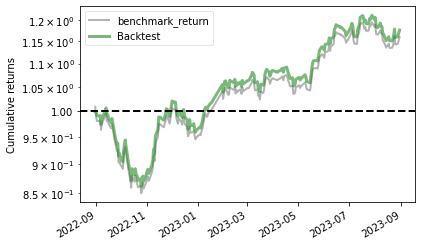

In [157]:
from pyfolio.plotting import plot_rolling_returns
plot_rolling_returns(returns,
                     benchmark_rets, 
                     logy=True, 
#                      volatility_match = True
                    )

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

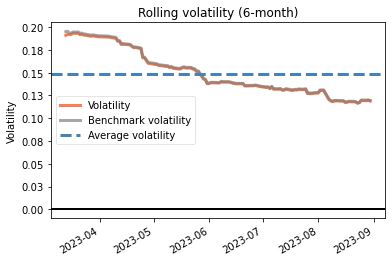

In [158]:
from pyfolio.plotting import plot_rolling_volatility
plot_rolling_volatility(returns,
                        factor_returns=benchmark_rets
                       )

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

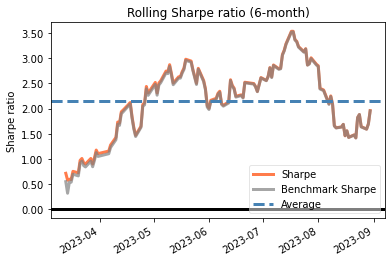

In [159]:
from pyfolio.plotting import plot_rolling_sharpe
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets
                       )

## 每月再平衡- 3

In [160]:
from zipline.api import (set_slippage, 
                         set_benchmark, 
                         set_commission, 
                         attach_pipeline, 
                         pipeline_output, 
                         symbol, 
                         order, 
                         order_target_percent,
                         schedule_function,
                         date_rules
                        )
from zipline import run_algorithm
from zipline.finance import slippage, commission
from zipline.pipeline import Pipeline
from zipline.pipeline.data import EquityPricing

def make_pipeline():
    
    condition1 = CustomDataset.ROE.latest.quintiles()
    condition2 = CustomDataset.Net_Income_Rate_percent_Q.latest.quintiles()
    condition3 = CustomDataset.Total_Assets_Turnover_Q.latest.quintiles()
    condition4 = CustomDataset.Financial_Leverage_Q.latest.quintiles()
    mkt = CustomDataset.Market_Cap_Dollars_Q.latest

    return Pipeline(
        columns = {
            "con1" : condition1,
            "con2" : condition2,
            "con3" : condition3,
            "con4" : condition4,
            "mkt" : mkt
        }
    )

def initialize(context):
    context.holding_position = list()
    set_slippage(slippage.VolumeShareSlippage())
    set_benchmark(symbol("IR0001"))
    set_commission(commission.PerShare(0.00285))
    attach_pipeline(make_pipeline(), "mystrategy")
    schedule_function(handle_data, date_rule=date_rules.month_end())
    
def handle_data(context, data):
    
    outs = pipeline_output('mystrategy')
    tradable = outs[outs["con3"] > 3].index.tolist() 
    buyable = list(set(tradable) - set(context.holding_position))
    sellable = context.holding_position
    new_buy, new_sell = [], []

    mybuy = outs.loc[tradable]
    mybuy['pct'] = mybuy['mkt'].apply(lambda x: x/sum(mybuy['mkt']))
    
    print("可買入:", buyable)
    print("上期持有部位:", context.holding_position)
    
    for stock in tradable:
        order_target_percent(stock, mybuy.loc[stock, 'pct'])
        new_buy.append(stock)
        
    for stock in sellable:
        if outs.loc[stock, "con3"] < 4:
            order_target_percent(stock, 0)
            new_sell.append(stock)
    
    context.holding_position = list(set(context.holding_position + new_buy) - set(new_sell) )
    
    print("新買入部位:", new_buy)
    print("新賣出部位:", new_sell)
    print("當期持有部位:", context.holding_position)
            
        
    print('-'*100)
    
def analyze(context, perf):
    pass

results = run_algorithm(
    start = pd.Timestamp("2022-08-31", tz = "utc"),
    end = pd.Timestamp('2023-08-30', tz ='utc'),
    initialize=initialize,
    bundle='tquant',
    analyze=analyze,
    capital_base=1e6,
#     handle_data = handle_data,
    custom_loader = Custom_loader
)

可買入: [Equity(2 [2329]), Equity(72 [6799]), Equity(9 [2351]), Equity(12 [2379]), Equity(81 [8271]), Equity(27 [3034]), Equity(28 [3035]), Equity(34 [3443]), Equity(41 [3592]), Equity(44 [3711]), Equity(45 [4919]), Equity(46 [4952]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6515])]
上期持有部位: []
新買入部位: [Equity(2 [2329]), Equity(9 [2351]), Equity(12 [2379]), Equity(27 [3034]), Equity(28 [3035]), Equity(34 [3443]), Equity(41 [3592]), Equity(44 [3711]), Equity(45 [4919]), Equity(46 [4952]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6515]), Equity(72 [6799]), Equity(81 [8271])]
新賣出部位: []
當期持有部位: [Equity(2 [2329]), Equity(72 [6799]), Equity(9 [2351]), Equity(12 [2379]), Equity(81 [8271]), Equity(27 [3034]), Equity(28 [3035]), Equity(34 [3443]), Equity(41 [3592]), Equity(44 [3711]), Equity(45 [4919]), Equity(46 [4952]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6515])]
--------------------------------------------------

可買入: []
上期持有部位: [Equity(2 [2329]), Equity(9 [2351]), Equity(74 [8016]), Equity(76 [8081]), Equity(81 [8271]), Equity(27 [3034]), Equity(28 [3035]), Equity(33 [3413]), Equity(34 [3443]), Equity(41 [3592]), Equity(42 [3661]), Equity(44 [3711]), Equity(45 [4919]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6515])]
新買入部位: [Equity(2 [2329]), Equity(9 [2351]), Equity(27 [3034]), Equity(28 [3035]), Equity(33 [3413]), Equity(34 [3443]), Equity(41 [3592]), Equity(42 [3661]), Equity(44 [3711]), Equity(45 [4919]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6515]), Equity(74 [8016]), Equity(76 [8081]), Equity(81 [8271])]
新賣出部位: []
當期持有部位: [Equity(2 [2329]), Equity(9 [2351]), Equity(74 [8016]), Equity(76 [8081]), Equity(81 [8271]), Equity(27 [3034]), Equity(28 [3035]), Equity(33 [3413]), Equity(34 [3443]), Equity(41 [3592]), Equity(42 [3661]), Equity(44 [3711]), Equity(45 [4919]), Equity(48 [4967]), Equity(49 [4968]), Equity(52 [5285]), Equity(61 [6

In [161]:
results.ending_cash

2022-08-31 13:30:00+08:00    1000000.000000
2022-09-01 13:30:00+08:00      26755.126169
2022-09-02 13:30:00+08:00      26755.126169
2022-09-05 13:30:00+08:00      26755.126169
2022-09-06 13:30:00+08:00      26755.126169
                                  ...      
2023-08-24 13:30:00+08:00      29179.574025
2023-08-25 13:30:00+08:00      32105.574025
2023-08-28 13:30:00+08:00      32105.574025
2023-08-29 13:30:00+08:00      32105.574025
2023-08-30 13:30:00+08:00      32105.574025
Name: ending_cash, Length: 241, dtype: float64

In [162]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# 時區標準化
returns.index = returns.index.tz_localize(None).tz_localize('UTC')
positions.index = positions.index.tz_localize(None).tz_localize('UTC')
transactions.index = transactions.index.tz_localize(None).tz_localize('UTC')
benchmark_rets.index = benchmark_rets.index.tz_localize(None).tz_localize('UTC')

In [163]:
from pyfolio.plotting import show_perf_stats
show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions
)

Start date,2022-08-31
End date,2023-08-30
Total months,11
,Backtest
Annual return,58.732%
Cumulative returns,55.563%
Annual volatility,28.55%
Sharpe ratio,1.76
Calmar ratio,3.39
Stability,0.86
Max drawdown,-17.327%


<AxesSubplot:ylabel='Cumulative returns'>

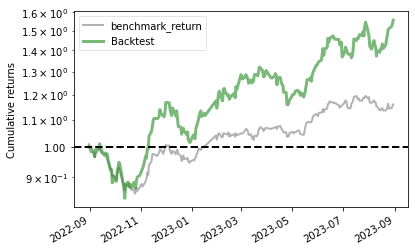

In [164]:
from pyfolio.plotting import plot_rolling_returns
plot_rolling_returns(returns,
                     benchmark_rets, 
                     logy=True, 
#                      volatility_match = True
                    )

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

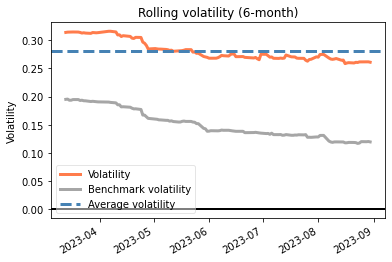

In [165]:
from pyfolio.plotting import plot_rolling_volatility
plot_rolling_volatility(returns,
                        factor_returns=benchmark_rets
                       )

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

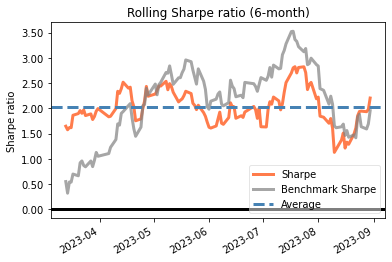

In [166]:
from pyfolio.plotting import plot_rolling_sharpe
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets
                       )

## 每月再平衡-4

In [167]:
from zipline.api import (set_slippage, 
                         set_benchmark, 
                         set_commission, 
                         attach_pipeline, 
                         pipeline_output, 
                         symbol, 
                         order, 
                         order_target_percent,
                         schedule_function,
                         date_rules
                        )
from zipline import run_algorithm
from zipline.finance import slippage, commission
from zipline.pipeline import Pipeline
from zipline.pipeline.data import EquityPricing

def make_pipeline():
    
    condition1 = CustomDataset.ROE.latest.quintiles()
    condition2 = CustomDataset.Net_Income_Rate_percent_Q.latest.quintiles()
    condition3 = CustomDataset.Total_Assets_Turnover_Q.latest.quintiles()
    condition4 = CustomDataset.Financial_Leverage_Q.latest.quintiles()
    mkt = CustomDataset.Market_Cap_Dollars_Q.latest

    return Pipeline(
        columns = {
            "con1" : condition1,
            "con2" : condition2,
            "con3" : condition3,
            "con4" : condition4,
            "mkt" : mkt
        }
    )

def initialize(context):
    context.holding_position = list()
    set_slippage(slippage.VolumeShareSlippage())
    set_benchmark(symbol("IR0001"))
    set_commission(commission.PerShare(0.00285))
    attach_pipeline(make_pipeline(), "mystrategy")
    schedule_function(handle_data, date_rule=date_rules.month_end())
    
def handle_data(context, data):
    
    outs = pipeline_output('mystrategy')
    tradable = outs[(outs["con4"] < 3) | (outs["con4"] > 0)].index.tolist() 
    buyable = list(set(tradable) - set(context.holding_position))
    sellable = context.holding_position
    new_buy, new_sell = [], []

    mybuy = outs.loc[tradable]
    mybuy['pct'] = mybuy['mkt'].apply(lambda x: x/sum(mybuy['mkt']))
    print("可買入:", buyable)
    print("上期持有部位:", context.holding_position)
    
    for stock in tradable:
        order_target_percent(stock, mybuy.loc[stock, 'pct'])
        new_buy.append(stock)
        
    for stock in sellable:
        if (outs.loc[stock, "con4"] > 2) | (outs.loc[stock, "con4"] < 1):
            order_target_percent(stock, 0)
            new_sell.append(stock)
    
    context.holding_position = list(set(context.holding_position + new_buy) - set(new_sell) )
    
    print("新買入部位:", new_buy)
    print("新賣出部位:", new_sell)
    print("當期持有部位:", context.holding_position)
            
        
    print('-'*100)
    
def analyze(context, perf):
    pass

results = run_algorithm(
    start = pd.Timestamp("2022-08-31", tz = "utc"),
    end = pd.Timestamp('2023-08-30', tz ='utc'),
    initialize=initialize,
    bundle='tquant',
    analyze=analyze,
    capital_base=1e6,
#     handle_data = handle_data,
    custom_loader = Custom_loader
)

可買入: [Equity(0 [2302]), Equity(1 [2303]), Equity(2 [2329]), Equity(3 [2330]), Equity(4 [2337]), Equity(5 [2338]), Equity(6 [2340]), Equity(7 [2342]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(11 [2369]), Equity(12 [2379]), Equity(13 [2388]), Equity(14 [2401]), Equity(15 [2408]), Equity(16 [2434]), Equity(17 [2436]), Equity(18 [2441]), Equity(19 [2449]), Equity(20 [2451]), Equity(21 [2454]), Equity(22 [2458]), Equity(23 [2481]), Equity(24 [3006]), Equity(25 [3014]), Equity(26 [3016]), Equity(27 [3034]), Equity(28 [3035]), Equity(29 [3041]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(35 [3450]), Equity(36 [3530]), Equity(37 [3532]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(41 [3592]), Equity(42 [3661]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(46 [4952]), Equity(47 [4961]), Equity(48 [4967]), Equity(49 [4968]), Equity(50 [5222]), Equity(51 [5269]), Equity(52 [5285]

可買入: [Equity(0 [2302]), Equity(2 [2329]), Equity(5 [2338]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(12 [2379]), Equity(15 [2408]), Equity(19 [2449]), Equity(20 [2451]), Equity(21 [2454]), Equity(22 [2458]), Equity(23 [2481]), Equity(24 [3006]), Equity(27 [3034]), Equity(29 [3041]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(38 [3545]), Equity(39 [3583]), Equity(41 [3592]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(50 [5222]), Equity(51 [5269]), Equity(52 [5285]), Equity(54 [6202]), Equity(55 [6239]), Equity(57 [6257]), Equity(59 [6415]), Equity(60 [6451]), Equity(62 [6525]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(68 [6719]), Equity(70 [6770]), Equity(73 [6854]), Equity(74 [8016]), Equity(75 [8028]), Equity(77 [8110]), Equity(78 [8131]), Equity(79 [8150]), Equity(80 [8261]), Equity(82 [IR0001])]
上期持有部位: [Equity(1 [2303]), Equity(3 [2330]), Eq

可買入: [Equity(0 [2302]), Equity(2 [2329]), Equity(3 [2330]), Equity(4 [2337]), Equity(5 [2338]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(12 [2379]), Equity(13 [2388]), Equity(15 [2408]), Equity(17 [2436]), Equity(19 [2449]), Equity(20 [2451]), Equity(23 [2481]), Equity(24 [3006]), Equity(28 [3035]), Equity(29 [3041]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(38 [3545]), Equity(39 [3583]), Equity(41 [3592]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(47 [4961]), Equity(48 [4967]), Equity(51 [5269]), Equity(52 [5285]), Equity(55 [6239]), Equity(57 [6257]), Equity(59 [6415]), Equity(60 [6451]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(68 [6719]), Equity(70 [6770]), Equity(73 [6854]), Equity(75 [8028]), Equity(77 [8110]), Equity(78 [8131]), Equity(79 [8150]), Equity(82 [IR0001])]
上期持有部位: [Equity(1 [2303]), Equity(6 [2340]), Equity(7 [2342]), Equit

可買入: [Equity(0 [2302]), Equity(2 [2329]), Equity(3 [2330]), Equity(4 [2337]), Equity(5 [2338]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(12 [2379]), Equity(13 [2388]), Equity(15 [2408]), Equity(17 [2436]), Equity(19 [2449]), Equity(20 [2451]), Equity(23 [2481]), Equity(24 [3006]), Equity(28 [3035]), Equity(29 [3041]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(38 [3545]), Equity(39 [3583]), Equity(41 [3592]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(47 [4961]), Equity(48 [4967]), Equity(51 [5269]), Equity(52 [5285]), Equity(55 [6239]), Equity(57 [6257]), Equity(59 [6415]), Equity(60 [6451]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(68 [6719]), Equity(70 [6770]), Equity(73 [6854]), Equity(75 [8028]), Equity(77 [8110]), Equity(78 [8131]), Equity(79 [8150]), Equity(82 [IR0001])]
上期持有部位: [Equity(1 [2303]), Equity(6 [2340]), Equity(7 [2342]), Equit

可買入: [Equity(2 [2329]), Equity(3 [2330]), Equity(4 [2337]), Equity(5 [2338]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(12 [2379]), Equity(13 [2388]), Equity(15 [2408]), Equity(17 [2436]), Equity(19 [2449]), Equity(20 [2451]), Equity(23 [2481]), Equity(24 [3006]), Equity(29 [3041]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(41 [3592]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(48 [4967]), Equity(51 [5269]), Equity(52 [5285]), Equity(53 [5471]), Equity(55 [6239]), Equity(57 [6257]), Equity(59 [6415]), Equity(60 [6451]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(68 [6719]), Equity(70 [6770]), Equity(75 [8028]), Equity(77 [8110]), Equity(78 [8131]), Equity(79 [8150]), Equity(82 [IR0001])]
上期持有部位: [Equity(0 [2302]), Equity(1 [2303]), Equity(6 [2340]), Equity(7 [2342]), Equit

可買入: [Equity(5 [2338]), Equity(8 [2344]), Equity(9 [2351]), Equity(10 [2363]), Equity(12 [2379]), Equity(13 [2388]), Equity(15 [2408]), Equity(18 [2441]), Equity(19 [2449]), Equity(21 [2454]), Equity(22 [2458]), Equity(23 [2481]), Equity(24 [3006]), Equity(30 [3094]), Equity(31 [3189]), Equity(32 [3257]), Equity(33 [3413]), Equity(34 [3443]), Equity(38 [3545]), Equity(39 [3583]), Equity(40 [3588]), Equity(41 [3592]), Equity(43 [3686]), Equity(44 [3711]), Equity(45 [4919]), Equity(47 [4961]), Equity(48 [4967]), Equity(51 [5269]), Equity(52 [5285]), Equity(53 [5471]), Equity(55 [6239]), Equity(57 [6257]), Equity(59 [6415]), Equity(60 [6451]), Equity(61 [6515]), Equity(63 [6531]), Equity(64 [6533]), Equity(65 [6552]), Equity(66 [6573]), Equity(67 [6695]), Equity(68 [6719]), Equity(70 [6770]), Equity(73 [6854]), Equity(74 [8016]), Equity(75 [8028]), Equity(77 [8110]), Equity(79 [8150]), Equity(82 [IR0001])]
上期持有部位: [Equity(0 [2302]), Equity(1 [2303]), Equity(2 [2329]), Equity(3 [2330]), Eq

In [168]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return

# 時區標準化
returns.index = returns.index.tz_localize(None).tz_localize('UTC')
positions.index = positions.index.tz_localize(None).tz_localize('UTC')
transactions.index = transactions.index.tz_localize(None).tz_localize('UTC')
benchmark_rets.index = benchmark_rets.index.tz_localize(None).tz_localize('UTC')

In [169]:
from pyfolio.plotting import show_perf_stats
show_perf_stats(
    returns, 
    benchmark_rets, 
    positions, 
    transactions
)

Start date,2022-08-31
End date,2023-08-30
Total months,11
,Backtest
Annual return,26.738%
Cumulative returns,25.434%
Annual volatility,13.862%
Sharpe ratio,1.78
Calmar ratio,2.05
Stability,0.86
Max drawdown,-13.031%


<AxesSubplot:ylabel='Cumulative returns'>

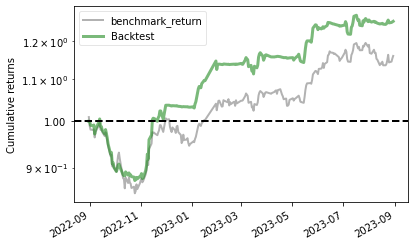

In [170]:
from pyfolio.plotting import plot_rolling_returns
plot_rolling_returns(returns,
                     benchmark_rets, 
                     logy=True, 
#                      volatility_match = True
                    )

<AxesSubplot:title={'center':'Rolling volatility (6-month)'}, ylabel='Volatility'>

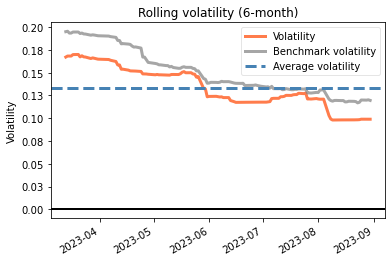

In [171]:
from pyfolio.plotting import plot_rolling_volatility
plot_rolling_volatility(returns,
                        factor_returns=benchmark_rets
                       )

<AxesSubplot:title={'center':'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

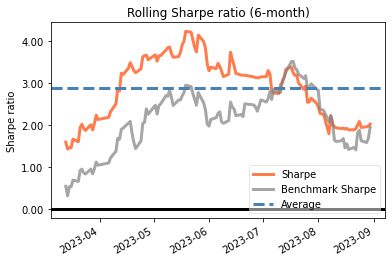

In [172]:
from pyfolio.plotting import plot_rolling_sharpe
plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets
                       )